In [420]:
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [421]:
import pandas as pd
from pandas import Series

In [422]:
data_analysis = pd.read_csv('./data_to_be_analysed/data_analysis_with_skills.csv')
data_mining = pd.read_csv('./data_to_be_analysed/data_mining_with_skills.csv')
machine_learning = pd.read_csv('./data_to_be_analysed/machine_learning_with_skills.csv')
business_analysis = pd.read_csv('./data_to_be_analysed/business_analysis_with_skills.csv')

---

## 添加薪资均值

In [423]:
import re
# 均值函数
def average(job_salary):
    # 取薪资均值----------------
    pattern = re.compile('\d+')
    salary = job_salary
    try:
        res = re.findall(pattern, salary)
        avg_salary = 0
        sum = 0
        for i in res:
            a = int(i)
            sum = sum + a
            avg_salary = sum / 2
    except Exception:
        avg_salary = 0
    # 函数返回值
    return avg_salary

salary_list = []
for i in range(0,data_analysis.shape[0]):
    avg_sal = average(data_analysis['职位薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

data_analysis.insert(9,'salary',sal)

In [424]:
salary_list = []
for i in range(0,data_mining.shape[0]):
    avg_sal = average(data_mining['职位薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

data_mining.insert(9,'salary',sal)

In [425]:
salary_list = []
for i in range(0,machine_learning.shape[0]):
    avg_sal = average(machine_learning['职位薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

machine_learning.insert(9,'salary',sal)

In [426]:
salary_list = []
for i in range(0,business_analysis.shape[0]):
    avg_sal = average(business_analysis['职位薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

business_analysis.insert(9,'salary',sal)

---

# 薪资分布探索

In [427]:
data_analysis.salary.describe()

count    575.000000
mean      17.446957
std        8.261053
min        2.500000
25%       11.500000
50%       15.000000
75%       22.500000
max       47.500000
Name: salary, dtype: float64

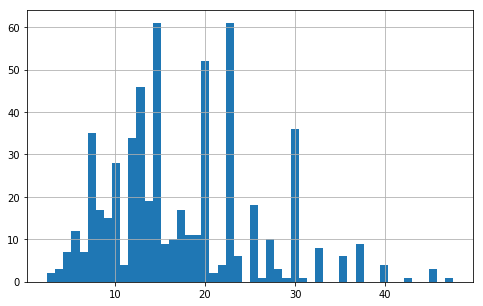

In [428]:
%matplotlib inline
import matplotlib.pyplot as plt
data_analysis.salary.hist(bins=50, figsize=(8,5))

plt.show()

- 薪资主要分布在**5k-30k**之间

---

In [429]:
data_analysis.head(2)

,Unnamed: 0,Keyword,公司名称,公司规模,地区,学历要求,工作经验,职位名称,职位描述,salary,...,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Tableau,Ppt,Spark
0,1,数据分析,上海恒奕集团,500-999人,上海 普陀区 武宁路,大专,1-3年,数据分析,岗位职责：通过抓取第三方数据来分析在不同地区，我们医院项目的目标人群画像分析，实时网络热度盘...,10.0,...,0,0,0,0,0,0,0,0,0,0
1,2,数据分析,晶赞科技,100-499人,上海 静安区 共和新路,本科,3-5年,数据分析,工作职责：1、负责政务数据/商业数据的研究和分析。例如，通过政务公开数据的挖掘和分析，形成主...,18.0,...,0,1,1,1,1,0,0,0,0,0


In [430]:
data_analysis = data_analysis.drop(['Unnamed: 0','Keyword','职位描述','职位薪资'],axis=1)

In [431]:
data_mining = data_mining.drop(['Unnamed: 0','Keyword','职位描述','职位薪资'],axis=1)

In [432]:
machine_learning = machine_learning.drop(['Unnamed: 0','Keyword','职位描述','职位薪资'],axis=1)

In [433]:
business_analysis = business_analysis.drop(['Unnamed: 0','Keyword','职位描述','职位薪资'],axis=1)

---

## 掌握的软件技能对薪资的影响关系

In [434]:
corr_matrix = data_analysis.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary     1.000000
Hive       0.292764
Hadoop     0.254448
Python     0.242217
Sql        0.235256
Spark      0.216505
Sas        0.119493
Tableau    0.044519
Spss       0.024708
Ppt       -0.042691
Excel     -0.140370
Name: salary, dtype: float64

- **Data Analysis**的职位中，`Hive`,`Spark`,`Hadoop`大数据应用方面的软件是**薪资的加分项**。
- 同时，`Python`,`SQL`,`SAS`,`Tableau`,`SPSS`等统计分析软件与可视化软件也是数据分析师**区别于低薪分析专员**的因素。
- `PPT`,`Excel`作为必须的软件技能，对薪资变化**并没有太大的影响**，甚至仅仅会Excel的职位沦落为专员，会是一个减分项。
- 结论：在数据分析领域，拥有**大数据软件技能**并且懂得**Python**这一编程语言的分析师的待遇较好。

In [435]:
corr_matrix = data_mining.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary    1.000000
Hive      0.195964
Spark     0.180962
Java      0.180336
Hadoop    0.136721
C         0.127518
Python    0.067957
Shell     0.020722
Linux    -0.009015
Sql      -0.052715
Sas      -0.089915
Name: salary, dtype: float64

- **Data Mining**的职位中，`Hive`,`Spark`,`Hadoop`大数据方面的软件是薪资**极大的加分项**。
- `Java`,`C`,`Python`等编程语言对数据挖掘的工作有很大帮助因此也体现在了对薪资的**正面影响**上。
- 分析结论：具备**数据挖掘算法与编码能力**且具备**大数据方面分析技能**的数据挖掘工程师的待遇较好。

In [436]:
corr_matrix = machine_learning.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary        1.000000
Hive          0.095518
Spark         0.093537
Java          0.064341
Tensorflow    0.059785
Hadoop        0.057670
Sql          -0.035192
Linux        -0.036466
C            -0.052703
Matlab       -0.058808
Python       -0.104268
Name: salary, dtype: float64

- **Machine Learning**的职位中，没有特别突出的技能加分项，列表中的软件技能基本都是入职必备的技能。
- `Hive`,`Spark`,`Hadoop`等大数据方面的技能会对薪资有一定程度的提升，不过影响较小。
- 分析结论：机器学习工程师入门难度稍高，需要掌握具备的软件技能也较多，没有特别突出的薪资加分项。

In [437]:
corr_matrix = business_analysis.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary    1.000000
C         0.399615
Python    0.377288
Linux     0.255181
Java      0.237707
Hive      0.153111
Sql       0.115494
Sas       0.085293
Excel     0.059614
Ppt      -0.057346
Spss     -0.068219
Name: salary, dtype: float64

- **Business Analysis**的职位中，编程语言是**极大的薪资加分项**。如`C`,`Python`,`Java`。
- `Excel`,`PPT`,`SPSS`等软件是这个职位的**必备技能**，因此对职位薪资没有太大的影响。
- 结论：在商业分析领域，拥有**商业分析思维**并且具有**编程能力**的分析师的待遇较好。

---

---

# 准备数据

In [438]:
data_analysis.head(2)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Tableau,Ppt,Spark
0,上海恒奕集团,500-999人,上海 普陀区 武宁路,大专,1-3年,数据分析,10.0,A轮,0,0,0,0,0,0,0,0,0,0
1,晶赞科技,100-499人,上海 静安区 共和新路,本科,3-5年,数据分析,18.0,D轮及以上,0,1,1,1,1,0,0,0,0,0


In [439]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_analysis, test_size=0.2, random_state=52)

In [440]:
data_train = train_set.copy()
data_test = test_set.copy()

In [441]:
data_train.shape

(460, 18)

In [442]:
data_test.shape

(115, 18)

In [443]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [444]:
data_analysis.head(1)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Tableau,Ppt,Spark
0,上海恒奕集团,500-999人,上海 普陀区 武宁路,大专,1-3年,数据分析,10.0,A轮,0,0,0,0,0,0,0,0,0,0


In [445]:
data_analysis_num = data_analysis.drop(['公司名称','公司规模','地区','学历要求','工作经验','职位名称','融资情况','salary'], axis=1)
num_attribs = list(data_analysis_num)
cat_attribs = ['公司规模','学历要求','工作经验','融资情况']

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_analysis_prepared = full_pipeline.fit_transform(data_train)
data_analysis_test = full_pipeline.transform(data_test)

In [446]:
data_analysis_prepared[:1]

array([[-1.04902651, -0.99566158, -0.6853091 , -0.58404441, -0.5       ,
        -0.4307749 , -0.38729833,  2.68594224, -0.37608404, -0.27343437,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ]])

In [447]:
data_analysis_labels = data_train.salary.values
test_labels = data_test.salary.values

---

# 训练模型

## Linear

In [448]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_analysis_prepared, data_analysis_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [449]:
from sklearn.metrics import mean_squared_error
import numpy as np

salary_predictions = lin_reg.predict(data_analysis_prepared)
lin_mse = mean_squared_error(data_analysis_labels, salary_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.402995127278521

In [450]:
#salary_predictions[:10]

### 测试集

In [451]:
data_test.head(10)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Tableau,Ppt,Spark
198,上海克顿文化传媒,100-499人,上海 黄浦区 新天地,本科,3-5年,数据分析师,11.5,已上市,0,0,0,0,1,0,0,0,1,0
316,今日头条,10000人以上,上海 徐汇区 上海南站,本科,1-3年,广告数据分析师,11.5,D轮及以上,1,0,1,1,1,0,0,0,0,0
52,壹米滴答,10000人以上,上海 青浦区 徐泾,本科,1-3年,资深BI数据分析师,16.0,C轮,1,0,0,0,0,0,1,0,0,1
313,拼多多,1000-9999人,上海 长宁区 天山路,本科,经验不限,数据分析师,22.5,已上市,1,1,0,0,0,1,0,0,0,0
19,太平洋房屋,10000人以上,上海 徐汇区 枫林路,本科,1-3年,数据分析师,12.0,已上市,1,1,1,0,0,0,0,1,0,0
482,印鹰,100-499人,上海 静安区 汶水路,本科,3-5年,数据分析经理,20.0,B轮,1,0,0,0,0,0,1,0,0,0
212,复硕正态,20-99人,上海 静安区 大宁路,本科,1-3年,高级数据分析员,10.0,不需要融资,0,0,0,0,1,0,0,0,1,0
127,云序生物,20-99人,上海 松江区 新桥,大专,1-3年,生信分析师/数据分析,8.0,不需要融资,0,1,0,0,0,0,0,0,0,0
401,上海创蓝文化传播,500-999人,上海 松江区 松江工业区,本科,1-3年,数据分析师,20.0,A轮,1,1,1,0,0,0,0,1,1,0
260,上海智帛,20-99人,上海 闵行区 漕宝路,大专,1-3年,数据分析,10.0,未融资,1,0,1,0,0,0,0,0,0,0


In [452]:
y_test = lin_reg.predict(data_analysis_test)
y_test[:10]

array([17.01653719, 16.41342787, 21.16768836, 19.22802331, 13.22095168,
       22.22075171, 11.02715534,  7.95300838, 13.12913168,  4.30171607])

In [453]:
test_labels[:10]

array([11.5, 11.5, 16. , 22.5, 12. , 20. , 10. ,  8. , 20. , 10. ])

In [454]:
lin_mse = mean_squared_error(test_labels, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.7698143548675915

- 测试集上误差约为**6.77**

### 交叉验证

In [455]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [456]:
display_scores(lin_rmse_scores)

Scores: [5.81120933 5.92292919 6.50970607 6.24610706 5.18158564 6.27624993
 7.37315509 6.07787995 5.67585695 4.86847943]
Mean: 5.994315863710689
Standard deviation: 0.6621760708217165


---

## D-Tree

### 建模训练

In [457]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=52)
tree_reg.fit(data_analysis_prepared, data_analysis_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=52, splitter='best')

In [458]:
y_pred_tree = tree_reg.predict(data_analysis_prepared)

In [459]:
from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(data_analysis_labels, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.4079709678742711

### 测试集

In [460]:
y_test = tree_reg.predict(data_analysis_test)
y_test[:10]

array([15. , 12.5, 10. , 27. , 30. , 14.5,  8. ,  7. , 12.5,  7. ])

In [461]:
test_labels[:10]

array([11.5, 11.5, 16. , 22.5, 12. , 20. , 10. ,  8. , 20. , 10. ])

In [462]:
tree_mse = mean_squared_error(test_labels, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

8.252411446722123

- 测试集上误差约为**8.25**

---

## Random Forest

### 建模训练

In [463]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=52)
forest_reg.fit(data_analysis_prepared, data_analysis_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=52, verbose=0, warm_start=False)

In [464]:
y_pred_rf = forest_reg.predict(data_analysis_prepared)
forest_mse = mean_squared_error(data_analysis_labels, y_pred_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.714777885552381

### 测试集

In [465]:
data_test[:10]

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Tableau,Ppt,Spark
198,上海克顿文化传媒,100-499人,上海 黄浦区 新天地,本科,3-5年,数据分析师,11.5,已上市,0,0,0,0,1,0,0,0,1,0
316,今日头条,10000人以上,上海 徐汇区 上海南站,本科,1-3年,广告数据分析师,11.5,D轮及以上,1,0,1,1,1,0,0,0,0,0
52,壹米滴答,10000人以上,上海 青浦区 徐泾,本科,1-3年,资深BI数据分析师,16.0,C轮,1,0,0,0,0,0,1,0,0,1
313,拼多多,1000-9999人,上海 长宁区 天山路,本科,经验不限,数据分析师,22.5,已上市,1,1,0,0,0,1,0,0,0,0
19,太平洋房屋,10000人以上,上海 徐汇区 枫林路,本科,1-3年,数据分析师,12.0,已上市,1,1,1,0,0,0,0,1,0,0
482,印鹰,100-499人,上海 静安区 汶水路,本科,3-5年,数据分析经理,20.0,B轮,1,0,0,0,0,0,1,0,0,0
212,复硕正态,20-99人,上海 静安区 大宁路,本科,1-3年,高级数据分析员,10.0,不需要融资,0,0,0,0,1,0,0,0,1,0
127,云序生物,20-99人,上海 松江区 新桥,大专,1-3年,生信分析师/数据分析,8.0,不需要融资,0,1,0,0,0,0,0,0,0,0
401,上海创蓝文化传播,500-999人,上海 松江区 松江工业区,本科,1-3年,数据分析师,20.0,A轮,1,1,1,0,0,0,0,1,1,0
260,上海智帛,20-99人,上海 闵行区 漕宝路,大专,1-3年,数据分析,10.0,未融资,1,0,1,0,0,0,0,0,0,0


In [466]:
y_test = forest_reg.predict(data_analysis_test)
y_test[:10]

array([20.08333333, 10.35      , 18.025     , 26.25      , 19.58333333,
       20.35      ,  9.11666667, 10.825     , 12.55428571,  9.1       ])

In [467]:
test_labels[:10]

array([11.5, 11.5, 16. , 22.5, 12. , 20. , 10. ,  8. , 20. , 10. ])

In [468]:
forest_mse = mean_squared_error(test_labels, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

7.087180783205348

- 测试集上误差约为**7.09**

### 交叉验证

In [469]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [470]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [5.92160593 6.47537707 8.01906699 5.64303733 6.39749406 7.22392532
 6.18275771 6.05244757 6.53447138 4.86251585]
Mean: 6.331269920627992
Standard deviation: 0.8130474122018511


---

# 网格搜索调参

In [471]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=52)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_analysis_prepared, data_analysis_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=52, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [472]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7.29061793698431 {'max_features': 2, 'n_estimators': 3}
6.413781857864982 {'max_features': 2, 'n_estimators': 10}
6.092544533188321 {'max_features': 2, 'n_estimators': 30}
7.107886960097701 {'max_features': 4, 'n_estimators': 3}
6.315256370330592 {'max_features': 4, 'n_estimators': 10}
5.976022358347516 {'max_features': 4, 'n_estimators': 30}
7.001163746738424 {'max_features': 6, 'n_estimators': 3}
6.1921055299084635 {'max_features': 6, 'n_estimators': 10}
5.996739844433075 {'max_features': 6, 'n_estimators': 30}
7.088902371406774 {'max_features': 8, 'n_estimators': 3}
6.292396346910386 {'max_features': 8, 'n_estimators': 10}
5.980558606686522 {'max_features': 8, 'n_estimators': 30}
7.0825937380292405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
6.412140716903331 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
7.062864506385558 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
6.337407579436449 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [473]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

## 变量重要性

In [474]:
feature_importances = grid_search.best_estimator_.feature_importances_
#feature_importances

In [475]:
num_attribs = list(data_analysis_num)
cat_attribs = ['公司规模','学历要求','工作经验','融资情况']

In [476]:
# 变量重要性排序
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.05883012920907406, 'Sql'),
 (0.05739271707726927, 'Hadoop'),
 (0.052855819385887605, 'Python'),
 (0.05042672750583558, '工作经验'),
 (0.04841490914313372, 'Hive'),
 (0.03169130633549138, 'Excel'),
 (0.0301026272691416, 'Spark'),
 (0.027897066519544437, 'Sas'),
 (0.02382836465248971, 'Spss'),
 (0.023060368955297835, '学历要求'),
 (0.022374373956317948, 'Tableau'),
 (0.01650026584689836, '融资情况'),
 (0.013561201776627235, 'Ppt'),
 (0.004150442668926646, '公司规模')]

- **公司规模**对薪资的影响很小。

---

# 最终模型

In [477]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(data_analysis_test)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [478]:
final_rmse

6.867133419234717

- 误差为6.87

---

# 薪资预测

In [479]:
salary_test_series = Series(final_predictions,index=data_test.index)

In [485]:
data_test_prediction = data_test.copy()
data_test_prediction.insert(7,'prediction',salary_test_series)

In [488]:
data_test_prediction.sample(10)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,prediction,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Tableau,Ppt,Spark
8,辰德网络科技,100-499人,上海,本科,1-3年,数据分析,7.0,8.916667,未融资,1,0,0,0,0,0,0,0,0,0
224,安心记加班,100-499人,上海 徐汇区 交大,本科,3-5年,高级数据分析师,22.5,17.355556,B轮,1,1,1,0,0,1,1,0,0,1
490,北京海金格医药科技,100-499人,上海 静安区 宜川路,本科,1年以内,临床数据分析,10.0,9.800000,已上市,0,0,0,1,0,0,0,0,0,0
230,任意门科技,100-499人,上海 浦东新区 花木,本科,1-3年,数据分析师,22.5,18.438889,C轮,1,1,0,0,0,1,0,1,0,1
299,天壤智能,100-499人,上海 徐汇区 龙华,本科,3-5年,数据分析师,32.5,18.216667,A轮,1,1,1,0,0,1,1,1,0,0
329,横援投资,20-99人,上海 松江区 九亭,本科,3-5年,数据分析师,11.5,12.033333,未融资,0,0,0,0,0,0,0,0,0,0
351,雅智捷,20-99人,上海 静安区 天目西路,本科,3-5年,高级咨询顾问 - 数据分析,15.0,18.466667,20-99人,1,0,0,1,0,0,0,0,0,0
316,今日头条,10000人以上,上海 徐汇区 上海南站,本科,1-3年,广告数据分析师,11.5,18.383333,D轮及以上,1,0,1,1,1,0,0,0,0,0
535,高顿教育,1000-9999人,上海 虹口区 虹口足球场,本科,3-5年,大数据产品经理(数据分析师),17.5,19.737222,C轮,0,0,0,0,0,0,0,0,0,0
520,浅橙科技,500-999人,上海 杨浦区 新江湾城,本科,经验不限,数据分析（风险政策）,7.5,18.483333,B轮,1,1,0,1,0,0,0,0,0,0


---